# Import

In [30]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
data = pd.read_excel("hand-label.xlsx")

X = data[["Single Subject", "Out of focus BG", "Vibrant colors", "Board Games", "Large concerts", "Sunsets", "Desert/Stony Mountains", "Small Concerts", "Main focus is City/Buildings", "Cloudy Skies", "Dull colors", "Blurry/low quality"]]
y = data["Photo Taker"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

train_x, test_x, train_y, test_y = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=True)

# Logistic Regression

In [23]:
model = LogisticRegression(class_weight="balanced", 
                                      max_iter=500
                                      )

model.fit(train_x, train_y)

y_prob = model.predict_proba(test_x)[:, 1]
y_train_prob = model.predict_proba(train_x)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

acc = accuracy_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8041237113402062
Confusion Matrix:
 [[34 17]
 [ 2 44]]


# Feature Importance

In [25]:
coefs = model.coef_[0]
importance = pd.Series(coefs, index=X.columns).sort_values()
print(importance)

Main focus is City/Buildings   -3.217276
Cloudy Skies                   -2.220013
Small Concerts                 -1.622384
Desert/Stony Mountains         -1.558697
Blurry/low quality             -1.220050
Out of focus BG                -0.246851
Dull colors                    -0.052177
Large concerts                  0.000000
Vibrant colors                  0.125100
Single Subject                  0.343862
Board Games                     0.403058
Sunsets                         1.003857
dtype: float64


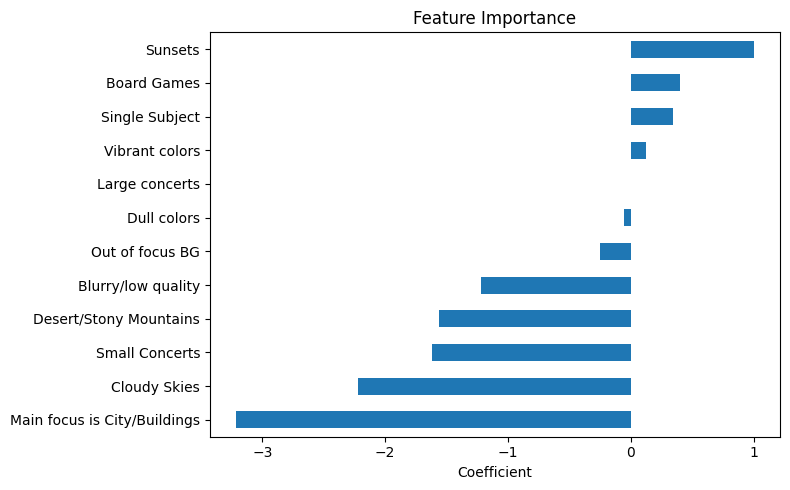

In [27]:
plt.figure(figsize=(8,5))
importance.plot(kind="barh")
plt.title("Feature Importance")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()

# Correlations

In [28]:
df = X.copy()
df['target'] = y_encoded

corr_scores = df.corr()['target'].drop('target')
corr_scores = corr_scores.sort_values(ascending=False)
print(corr_scores)

Single Subject                  0.109865
Vibrant colors                  0.091543
Board Games                     0.083414
Sunsets                         0.067023
Out of focus BG                 0.066218
Dull colors                    -0.059162
Small Concerts                 -0.114454
Desert/Stony Mountains         -0.120040
Blurry/low quality             -0.133835
Cloudy Skies                   -0.290020
Main focus is City/Buildings   -0.528847
Large concerts                       NaN
Name: target, dtype: float64


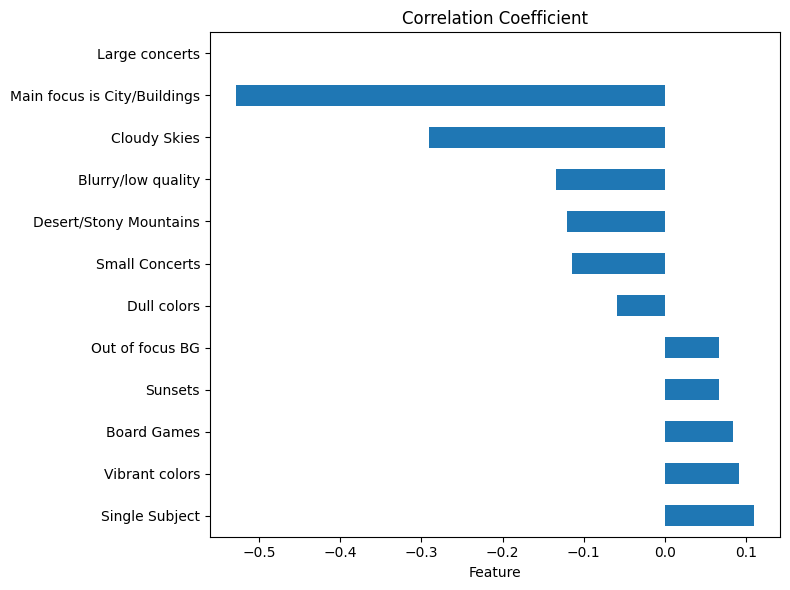

In [31]:
plt.figure(figsize=(8,6))
corr_scores.plot(kind="barh")
plt.title("Correlation Coefficient")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


# Feature Distribution

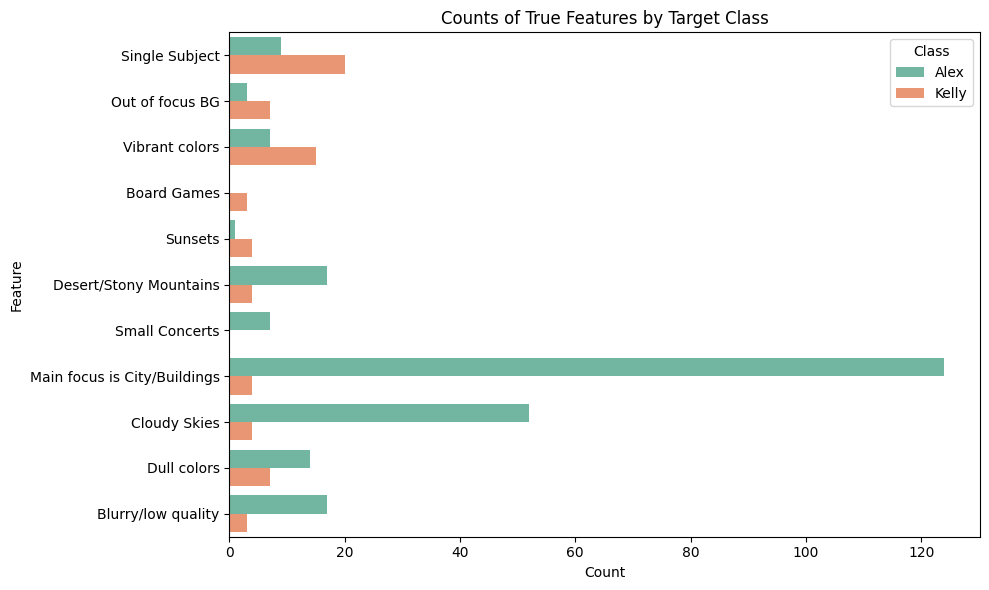

In [36]:

features = ["Single Subject", "Out of focus BG", "Vibrant colors", "Board Games", "Large concerts", "Sunsets", "Desert/Stony Mountains", "Small Concerts", "Main focus is City/Buildings", "Cloudy Skies", "Dull colors", "Blurry/low quality"]

df_plot = df[features + ['target']].copy()

df_plot[features] = df_plot[features].astype(int)

df_long = df_plot.melt(id_vars='target', value_vars=features,
                        var_name='Feature', value_name='Value')

df_long = df_long[df_long['Value'] == 1]

label_map = {0: 'Alex', 1: 'Kelly'}
df_long['target'] = df_long['target'].map(label_map)

plt.figure(figsize=(10,6))
sns.countplot(data=df_long, y='Feature', hue='target', palette='Set2')
plt.title("Counts of True Features by Target Class")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.legend(title='Class')
plt.tight_layout()
plt.show()